In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# 디바이스 설정 (GPU 사용 가능 시 GPU 사용)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# MNIST 데이터셋 로드
train_dataset = datasets.MNIST(root='data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data',
                              train=False,
                              transform=transforms.ToTensor())

batch_size = 16
# 데이터 로더 설정
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.92MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.18MB/s]


Image batch shape: torch.Size([32, 1, 28, 28])
Label batch shape: torch.Size([32])


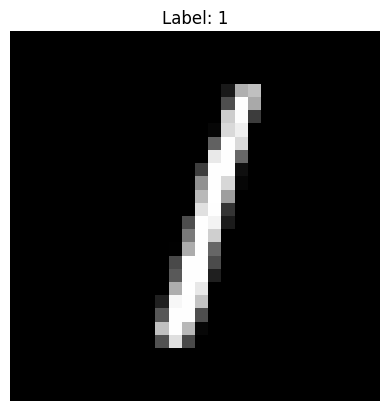

In [ ]:
# train_loader에서 데이터 샘플 확인
images, labels = next(iter(train_loader))

print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)

# 첫 번째 이미지와 라벨 표시
import matplotlib.pyplot as plt

img = images[0].squeeze()
label = labels[0]

plt.imshow(img, cmap="gray")
plt.title(f"Label: {label.item()}")
plt.axis("off")
plt.show()

In [ ]:
# 신경망 모델 정의
class NeuralMLP(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralMLP, self).__init__()
    self.block1 = nn.Sequential(nn.Linear(input_size, hidden_size),
                   nn.ReLU())
    self.block2 = nn.Sequential(nn.Linear(hidden_size, hidden_size),
                   nn.ReLU())
    self.output = nn.Linear(hidden_size, num_classes)


  def forward(self, x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.block2(x)
    x = self.block2(x)
    out = self.output(x)
    return out

In [ ]:
# 하이퍼파라미터 설정
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 32
learning_rate = 0.001

model = NeuralMLP(input_size, hidden_size, num_classes).to(device)

# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 모델 학습
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 이미지 크기 조정 및 디바이스로 이동
    # images = images.reshape(-1, input_size).to(device)
    images = images.to(device)
    labels = labels.to(device)

    # 순방향 계산
    outputs = model(images).squeeze()
    loss = criterion(outputs, labels)

    # 역전파 및 옵티마이저
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 100 == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

  # 모델 테스트
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
      # images = images.reshape(-1, input_size).to(device)
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# 모델 저장 (선택 사항)
# torch.save(model.state_dict(), 'model.ckpt')


Epoch [1/5], Step [100/1875], Loss: 1.7327
Epoch [1/5], Step [200/1875], Loss: 0.7870
Epoch [1/5], Step [300/1875], Loss: 0.4260
Epoch [1/5], Step [400/1875], Loss: 0.4255
Epoch [1/5], Step [500/1875], Loss: 0.3373
Epoch [1/5], Step [600/1875], Loss: 0.1777
Epoch [1/5], Step [700/1875], Loss: 0.2264
Epoch [1/5], Step [800/1875], Loss: 0.1157
Epoch [1/5], Step [900/1875], Loss: 0.2085
Epoch [1/5], Step [1000/1875], Loss: 0.1694
Epoch [1/5], Step [1100/1875], Loss: 0.1479
Epoch [1/5], Step [1200/1875], Loss: 0.1027
Epoch [1/5], Step [1300/1875], Loss: 0.2731
Epoch [1/5], Step [1400/1875], Loss: 0.0427
Epoch [1/5], Step [1500/1875], Loss: 0.1087
Epoch [1/5], Step [1600/1875], Loss: 0.0295
Epoch [1/5], Step [1700/1875], Loss: 0.1391
Epoch [1/5], Step [1800/1875], Loss: 0.1197
Test Accuracy of the model on the 10000 test images: 96.28 %
Epoch [2/5], Step [100/1875], Loss: 0.0270
Epoch [2/5], Step [200/1875], Loss: 0.1844
Epoch [2/5], Step [300/1875], Loss: 0.2661
Epoch [2/5], Step [400/1875

In [ ]:
# 신경망 모델 정의
input_ch = 1
hidden_ch1 = 32
hidden_ch2 = 64
hidden_ch3 = 256
hidden_ch4 = 512
padding_sz = 1
kernel_sz = 3
pool_sz = 2

class NeuralCNN(nn.Module):
  def __init__(self, input_ch, hidden_size, num_classes):
    super(NeuralCNN, self).__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(input_ch, hidden_ch1,kernel_size=kernel_sz, padding=padding_sz),
        nn.ReLU())
    self.block2 = nn.Sequential(
        nn.Conv2d(hidden_ch1, hidden_ch2,kernel_size=kernel_sz, padding=padding_sz),
        nn.ReLU())
    self.block3 = nn.Sequential(
        nn.Conv2d(hidden_ch2, hidden_ch3,kernel_size=kernel_sz, padding=padding_sz),
        nn.ReLU())
    self.block4 = nn.Sequential(
        nn.Conv2d(hidden_ch3, hidden_ch4,kernel_size=kernel_sz, padding=padding_sz),
        nn.ReLU())

    self.pool = nn.MaxPool2d(pool_sz, pool_sz)
    self.gap = nn.AdaptiveAvgPool2d(1)

    self.output = nn.Linear(hidden_ch4, num_classes)


  def forward(self, x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.pool(x)

    x = self.block3(x)
    x = self.block4(x)
    x = self.gap(x)
    out = self.output(x.squeeze())

    return out

In [ ]:
# 하이퍼파라미터 설정
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 32
learning_rate = 0.001

model = NeuralCNN(input_size, hidden_size, num_classes).to(device)
# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 모델 학습
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 이미지 크기 조정 및 디바이스로 이동
    # images = images.reshape(-1, input_size).to(device)
    images = images.to(device)
    labels = labels.to(device)

    # 순방향 계산
    outputs = model(images).squeeze()
    loss = criterion(outputs, labels)

    # 역전파 및 옵티마이저
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 100 == 0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

  # 모델 테스트
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
      # images = images.reshape(-1, input_size).to(device)
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# 모델 저장 (선택 사항)
# torch.save(model.state_dict(), 'model.ckpt')


Epoch [1/5], Step [100/1875], Loss: 1.7327
Epoch [1/5], Step [200/1875], Loss: 0.7870
Epoch [1/5], Step [300/1875], Loss: 0.4260
Epoch [1/5], Step [400/1875], Loss: 0.4255
Epoch [1/5], Step [500/1875], Loss: 0.3373
Epoch [1/5], Step [600/1875], Loss: 0.1777
Epoch [1/5], Step [700/1875], Loss: 0.2264
Epoch [1/5], Step [800/1875], Loss: 0.1157
Epoch [1/5], Step [900/1875], Loss: 0.2085
Epoch [1/5], Step [1000/1875], Loss: 0.1694
Epoch [1/5], Step [1100/1875], Loss: 0.1479
Epoch [1/5], Step [1200/1875], Loss: 0.1027
Epoch [1/5], Step [1300/1875], Loss: 0.2731
Epoch [1/5], Step [1400/1875], Loss: 0.0427
Epoch [1/5], Step [1500/1875], Loss: 0.1087
Epoch [1/5], Step [1600/1875], Loss: 0.0295
Epoch [1/5], Step [1700/1875], Loss: 0.1391
Epoch [1/5], Step [1800/1875], Loss: 0.1197
Test Accuracy of the model on the 10000 test images: 96.28 %
Epoch [2/5], Step [100/1875], Loss: 0.0270
Epoch [2/5], Step [200/1875], Loss: 0.1844
Epoch [2/5], Step [300/1875], Loss: 0.2661
Epoch [2/5], Step [400/1875

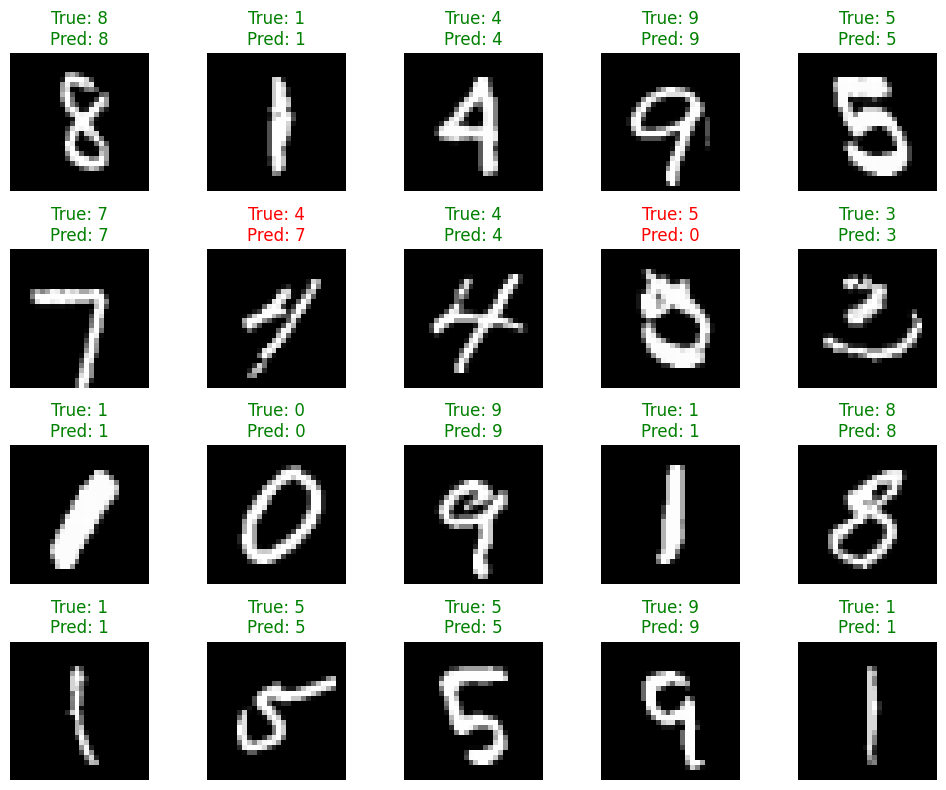

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 테스트 셋에서 20개 샘플 추출
sample_indices = np.random.choice(len(test_dataset), 20, replace=False)
sampled_images = [test_dataset[i][0] for i in sample_indices]
sampled_labels = [test_dataset[i][1] for i in sample_indices]

# 모델 예측
model.eval()  # 평가 모드로 설정
predicted_labels = []
with torch.no_grad():
  for image in sampled_images:
    # image = image.reshape(-1, input_size).to(device)
    image = image.to(device)
    output = model(image).argmax()
    predicted_labels.append(output.item())

# 결과 시각화
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(sampled_images[i].squeeze().numpy(), cmap='gray')
  ax.set_title(f'True: {sampled_labels[i]}\nPred: {predicted_labels[i]}',
               color='green' if sampled_labels[i] == predicted_labels[i] else 'red')
  ax.axis('off')
plt.tight_layout()
plt.show()